In [1]:
#Для общего топа интересна классификация на основе часовых поясов. 
#Постараться выделить часы наибольшей активности игроков в городах данного пояса.
import pandas as pd
import seaborn
import geopy
from datetime import datetime
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import numpy as np
import matplotlib.pyplot as plt
import pytz
from pytz import country_timezones

%matplotlib inline

timezone_country = {}
for countrycode in country_timezones:
    timezones = country_timezones[countrycode]
    for timezone in timezones:
        timezone_country[timezone] = countrycode


def hour(timestamp):
    now  = datetime.fromtimestamp(timestamp)
    return now.hour

def hour_utc(timestamp):
    now  = datetime.utcfromtimestamp(timestamp)
    return now.hour

def get_timezone(city):
    place,(lat,lon) = do_geocode(city)
    timezone = do_timezone((lat,lon))
    return timezone

def do_geocode(address):
    g = geopy.GoogleV3()
    try:
        return g.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)

def do_timezone((lat,lon)):
    g = geopy.GoogleV3()
    try:
        return g.timezone((lat,lon))
    except GeocoderTimedOut:
        return do_timezone((lat,lon))    
    
print "imported!"

imported!


Index([u'id', u'utc_timestamp', u'gender', u'birthyear', u'country', u'region',
       u'city', u'traffic', u'traftype'],
      dtype='object')
297              Köln
298           Leipzig
299           Jakarta
300        Birmingham
301            Athens
302    Rio De Janeiro
303         Bucharest
304          Montréal
305             Paris
306        Montevideo
307      Buenos Aires
308          Belgrade
309         São Paulo
310            Warsaw
311           Bangkok
312          Istanbul
313           Hamburg
314            London
315            Berlin
316             Hanoi
Name: city, dtype: object
City list was created. The length of city list:  317


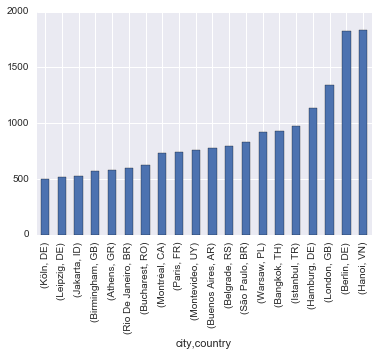

In [2]:
#найдем города по количеству игроков
pinfo_ww = pd.read_csv("pinfo_ww.csv", sep="|")
print pinfo_ww.columns
table_count_players = pinfo_ww.groupby(['city','country']).size()
table_count_players.sort_values(inplace=True)
table_count_players.tail(20)
table_count_players.sort_values().tail(20).plot(kind='bar')

#города ко-во пользователей которых составляет >100
table_count_players = table_count_players[table_count_players > 100]
df_table_count_players = pd.DataFrame(table_count_players)
df_table_count_players = df_table_count_players.reset_index(level=['city','country'])
df_table_count_players.tail(20)

city_list = df_table_count_players.city
print city_list.tail(20) #города ко-во пользователей которых составляет >100
print "City list was created. The length of city list: ",len(df_table_count_players)

In [3]:
pact_ww = pd.read_csv("pact+pinfo.csv", sep="|")
print pact_ww.columns

print "Read!"

Index([u'Unnamed: 0', u'id', u'actdate', u'actdate_num', u'actflag',
       u'payflag', u'pgrflag', u'ml_num', u'transactions', u'quests_end',
       u'm_quests_end', u'days_from_last_actdate', u'days_from_last_payment',
       u'utc_timestamp', u'gender', u'birthyear', u'country', u'region',
       u'city', u'traffic', u'traftype'],
      dtype='object')
Read!


In [4]:
group = pact_ww.groupby(['city','utc_timestamp','actflag','country'], as_index=True).size()
group = group.rename("max_act")

In [5]:
group = group.reset_index(level=['city','utc_timestamp','actflag','country'])

In [6]:
group = group[group.actflag != False]

In [7]:
group["hour"] = "" #добавляем параметр hour

In [8]:
hour_utc_list = []
for stamp in group.utc_timestamp:
    hour_utc_list.append(hour_utc(stamp))

In [9]:
group["hour"] = hour_utc_list

print group.head(3)
print "len: ",len(group.hour)

              city  utc_timestamp actflag country  max_act  hour
1     's-graveland     1452694444    True      NL        2    14
2    's-gravenhage     1453645320    True      NL        1    14
3  's-gravenpolder     1454513704    True      NL        1    15
len:  244135


In [10]:
pinfo_ww = pd.read_csv("pinfo_ww.csv", sep="|")
geolocator = Nominatim()
TZ_list = []

In [11]:
"""#ПАРСИНГ ЧАСОВОГО ПОЯСА ГОРОДОВ (city_list)
#ЗАПУСКАТЬ ЕСЛИ НЕ СФОРМИРОВАН TZ_list !!!!!!!!!!!!
try:
    TZ = pd.read_csv("time_zone.csv")
    TZ_list = TZ.time_zone
except:
    i = 1
    for city in city_list:
        tmp = get_timezone(city)
        TZ_list.append(tmp)
        print tmp #," :::  ", i
        #i+=1"""

'#\xd0\x9f\xd0\x90\xd0\xa0\xd0\xa1\xd0\x98\xd0\x9d\xd0\x93 \xd0\xa7\xd0\x90\xd0\xa1\xd0\x9e\xd0\x92\xd0\x9e\xd0\x93\xd0\x9e \xd0\x9f\xd0\x9e\xd0\xaf\xd0\xa1\xd0\x90 \xd0\x93\xd0\x9e\xd0\xa0\xd0\x9e\xd0\x94\xd0\x9e\xd0\x92 (city_list)\n#\xd0\x97\xd0\x90\xd0\x9f\xd0\xa3\xd0\xa1\xd0\x9a\xd0\x90\xd0\xa2\xd0\xac \xd0\x95\xd0\xa1\xd0\x9b\xd0\x98 \xd0\x9d\xd0\x95 \xd0\xa1\xd0\xa4\xd0\x9e\xd0\xa0\xd0\x9c\xd0\x98\xd0\xa0\xd0\x9e\xd0\x92\xd0\x90\xd0\x9d TZ_list !!!!!!!!!!!!\ntry:\n    TZ = pd.read_csv("time_zone.csv")\n    TZ_list = TZ.time_zone\nexcept:\n    i = 1\n    for city in city_list:\n        tmp = get_timezone(city)\n        TZ_list.append(tmp)\n        print tmp #," :::  ", i\n        #i+=1'

In [12]:
TZ = pd.read_csv("time_zone.csv")
TZ_list = TZ.time_zone

In [13]:
print len(TZ_list)

317


In [14]:
utc_list = []
for tz in TZ_list:
    today = datetime.now()
    pst = pytz.timezone(tz)
    utc_list.append(pst.utcoffset(today).total_seconds()/60/60) 

In [15]:
print len(utc_list)

317


In [16]:
print len(city_list)

317


In [17]:
country_list = []
country_list = df_table_count_players.country
print len(country_list)

317


In [18]:
data = {
    'city':city_list,
    'country':country_list,
    'time_zone':TZ_list,
    'utc':utc_list
}
df_city_time_zone = pd.DataFrame(data)

In [19]:
df_result = pd.merge(group, df_city_time_zone, how='inner', on=['city','country'])
print group.columns
print df_city_time_zone.columns
print df_result.columns

Index([u'city', u'utc_timestamp', u'actflag', u'country', u'max_act', u'hour'], dtype='object')
Index([u'city', u'country', u'time_zone', u'utc'], dtype='object')
Index([u'city', u'utc_timestamp', u'actflag', u'country', u'max_act', u'hour',
       u'time_zone', u'utc'],
      dtype='object')


In [20]:
table = df_result.pivot_table(values='max_act', index=['country','utc'], columns='hour', aggfunc='sum')

In [21]:
table.head(20)

hour              0      1      2      3      4      5       6       7   \
country utc                                                               
AR      -3.0   145.0  128.0   69.0   57.0   58.0   52.0    21.0     8.0   
AT       2.0    10.0   47.0    6.0    NaN   81.0   80.0    17.0    65.0   
AU      -4.0    40.0   59.0   88.0   57.0   82.0   31.0    48.0    53.0   
         8.0    20.0   19.0   14.0   61.0   53.0   31.0    37.0    60.0   
         9.5    49.0   36.0  103.0   45.0   28.0   52.0    76.0    27.0   
         10.0   85.0   47.0  133.0   80.0   31.0  226.0    73.0   144.0   
BA       2.0     6.0    3.0    1.0    1.0    6.0    1.0     4.0    18.0   
BD       6.0     2.0    4.0   12.0    9.0   10.0    7.0    35.0    20.0   
BE       2.0    75.0    9.0    2.0    2.0   13.0   60.0    80.0    96.0   
BG       3.0     3.0    2.0    NaN    NaN    NaN    4.0     3.0    11.0   
BR      -6.0    31.0   33.0   20.0   11.0    1.0    1.0     NaN     NaN   
        -3.0   359.0  337.0  247.0  169.0   83.0   69.0    21.0    59.0   
CA      -6.0   134.0  113.0   71.0   68.0   77.0   66.0   108.0    15.0   
        -5.0    25.0   24.0   29.0   25.0   25.0   11.0    95.0    26.0   
        -4.0   308.0  415.0  354.0  332.0  159.0  218.0    86.0   100.0   
         1.0    49.0   17.0   33.0   16.0   12.0   11.0    13.0     2.0   
CL      -4.0    37.0   55.0   41.0   24.0   58.0   13.0     3.0     5.0   
CO      -5.0   192.0  106.0  110.0   69.0   22.0   16.0    20.0     2.0   
CZ       2.0    27.0    1.0    1.0    1.0    4.0   27.0    41.0    13.0   
DE       2.0   773.0  349.0  230.0  358.0  460.0  553.0  1373.0  1347.0   

hour               8       9   ...        14      15      16      17      18  \
country utc                    ...                                             
AR      -3.0     25.0    24.0  ...     101.0    45.0    76.0    63.0    97.0   
AT       2.0     96.0   132.0  ...     112.0   127.0   109.0   216.0   175.0   
AU      -4.0     33.0    18.0  ...      40.0     4.0     5.0    19.0     2.0   
         8.0     21.0    47.0  ...      16.0    21.0    28.0     3.0     NaN   
         9.5     71.0    11.0  ...       7.0     4.0     4.0     NaN     1.0   
         10.0    31.0    52.0  ...       6.0     2.0     7.0    21.0    28.0   
BA       2.0     14.0    79.0  ...      16.0     5.0    30.0    20.0    56.0   
BD       6.0     18.0    12.0  ...       8.0    20.0    24.0    13.0    11.0   
BE       2.0    161.0   163.0  ...     171.0   107.0   339.0   162.0   173.0   
BG       3.0      6.0    10.0  ...      10.0    19.0     9.0    22.0    48.0   
BR      -6.0      NaN     1.0  ...      38.0    25.0    25.0    31.0    46.0   
        -3.0      7.0     6.0  ...     209.0   223.0   288.0   406.0   323.0   
CA      -6.0      9.0    13.0  ...      59.0    56.0    80.0    83.0   202.0   
        -5.0     13.0     4.0  ...       5.0    19.0    12.0    32.0    21.0   
        -4.0    103.0     8.0  ...     311.0   398.0   347.0   268.0   375.0   
         1.0      NaN    24.0  ...      31.0    34.0   164.0    14.0    21.0   
CL      -4.0      NaN     NaN  ...      37.0    17.0    39.0    14.0    28.0   
CO      -5.0      NaN     NaN  ...      42.0    68.0    94.0   141.0    90.0   
CZ       2.0     28.0    49.0  ...     111.0    65.0    68.0    22.0    47.0   
DE       2.0   1866.0  2391.0  ...    2504.0  2886.0  2966.0  2807.0  3045.0   

hour               19      20      21      22     23  
country utc                                           
AR      -3.0    128.0   115.0   110.0   109.0  204.0  
AT       2.0    113.0   102.0   137.0   148.0   63.0  
AU      -4.0     30.0     8.0    19.0    37.0   28.0  
         8.0      NaN     3.0     NaN     4.0   13.0  
         9.5      7.0     2.0     NaN     8.0    2.0  
         10.0    12.0    48.0    24.0   100.0  115.0  
BA       2.0     61.0    45.0    54.0    10.0    7.0  
BD       6.0     21.0    15.0     1.0     4.0    4.0  
BE       2.0    377.0   209.0    53.0 

In [22]:
country_list =  table.index.values
c_list = []
for country in country_list:
    c_list.append(country[0])
    
c_list = set(c_list)

C:\Users\Maxim\Anaconda2\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


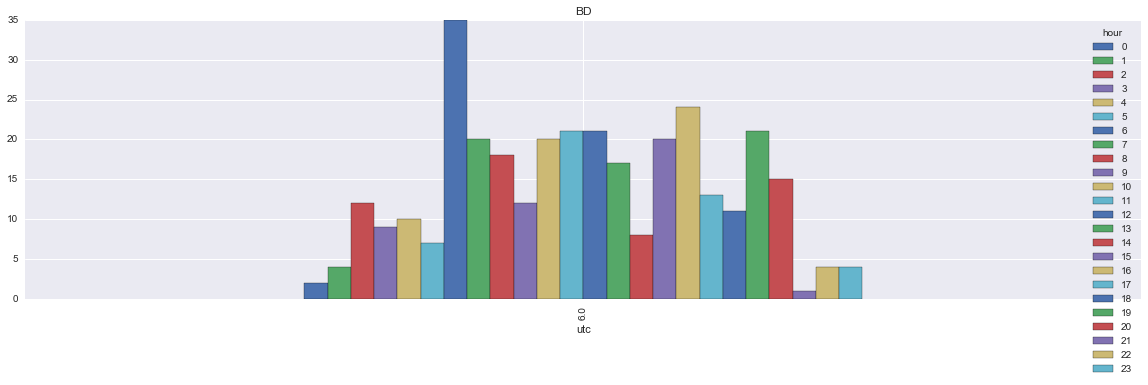

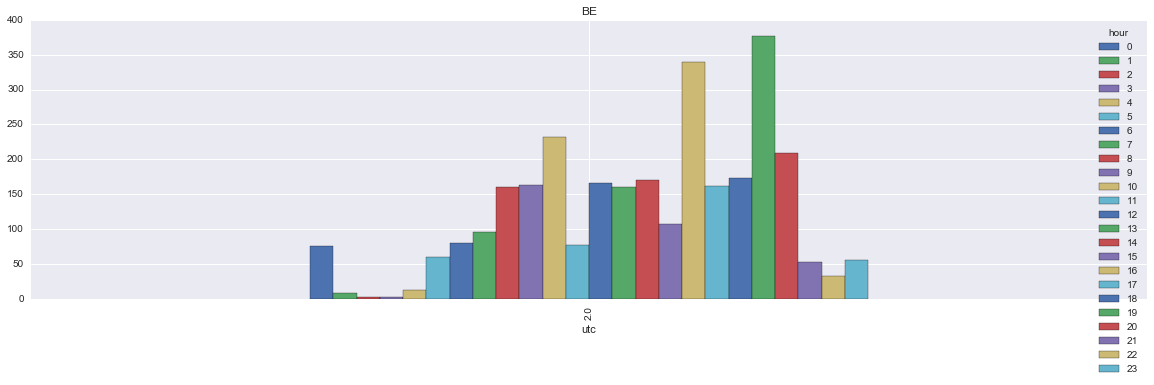

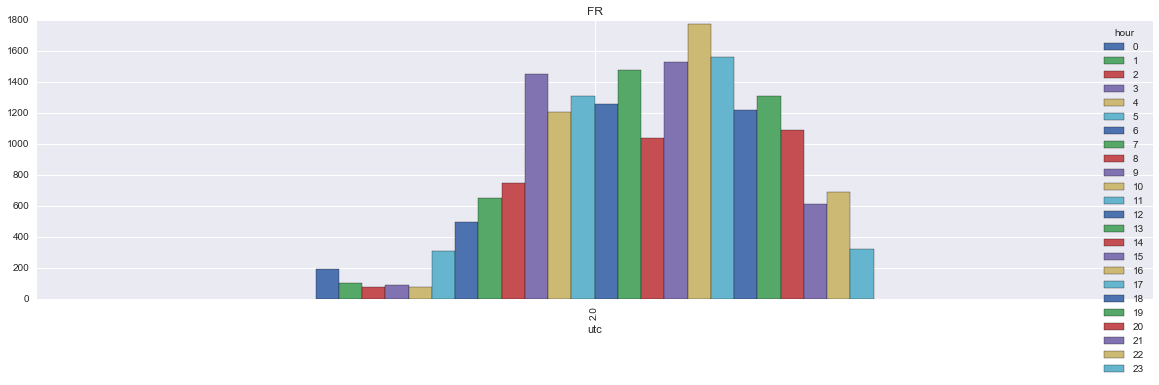

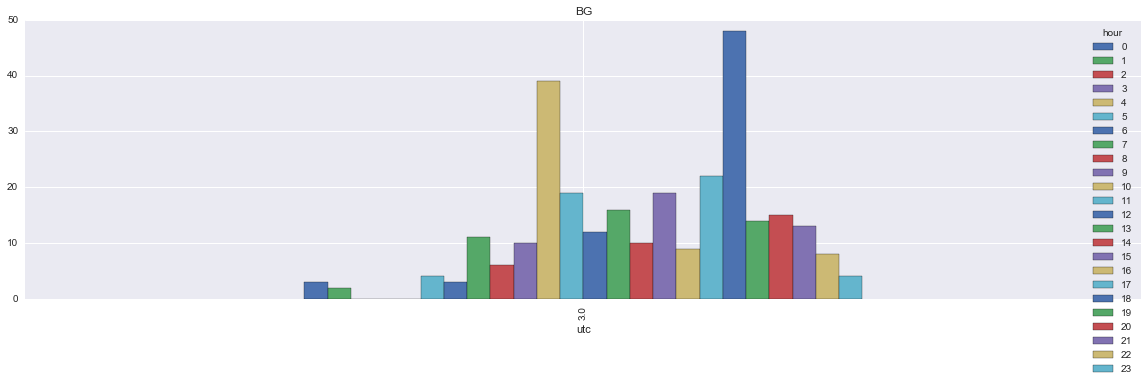

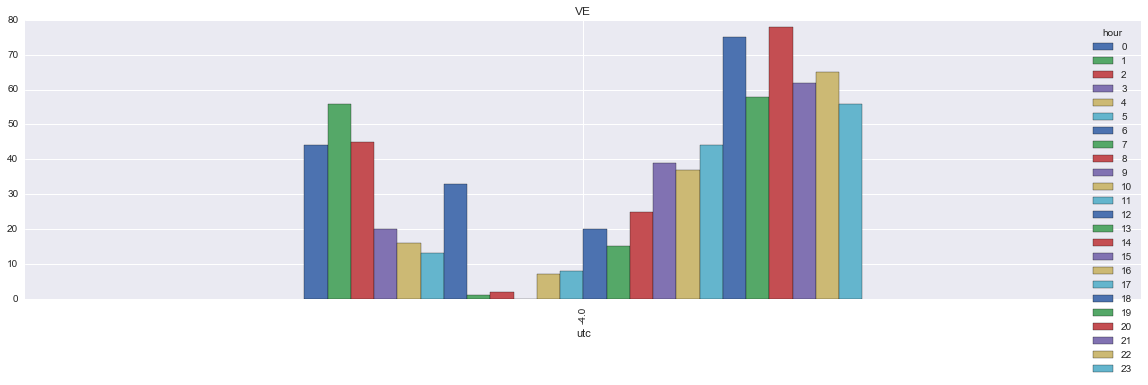

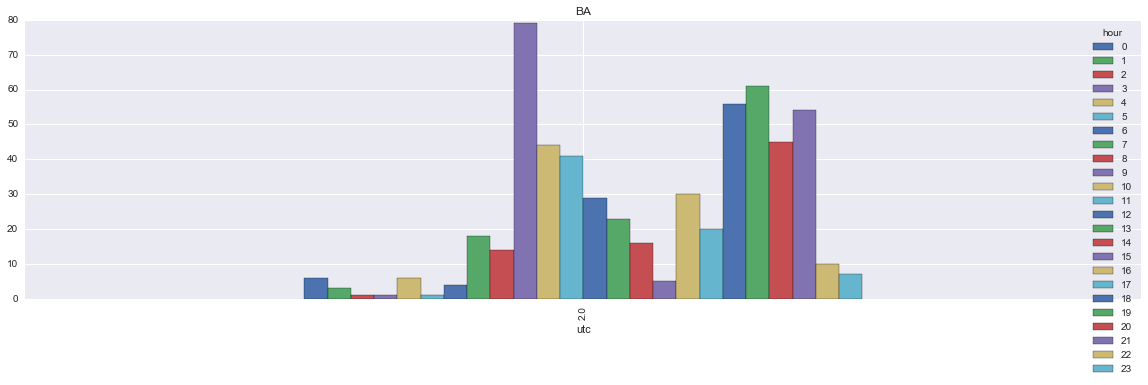

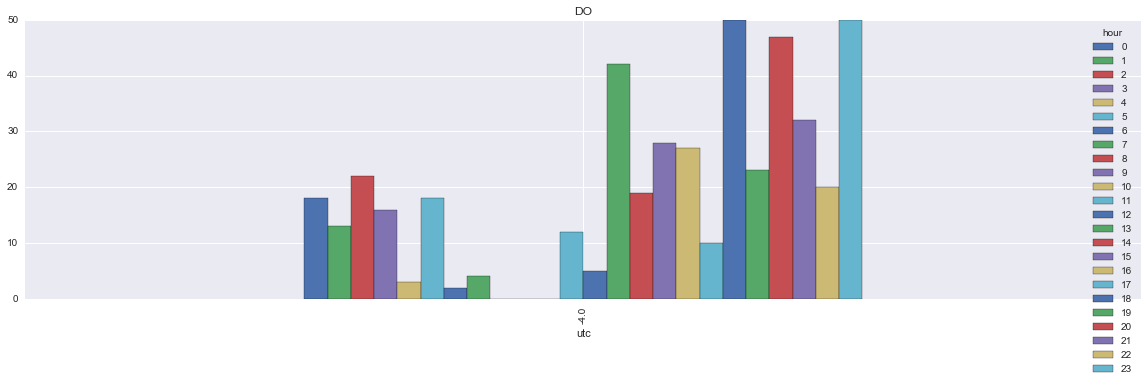

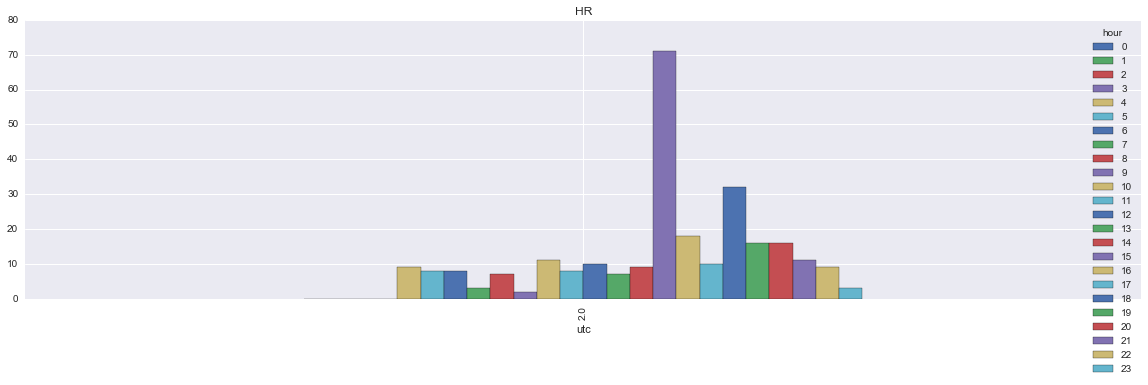

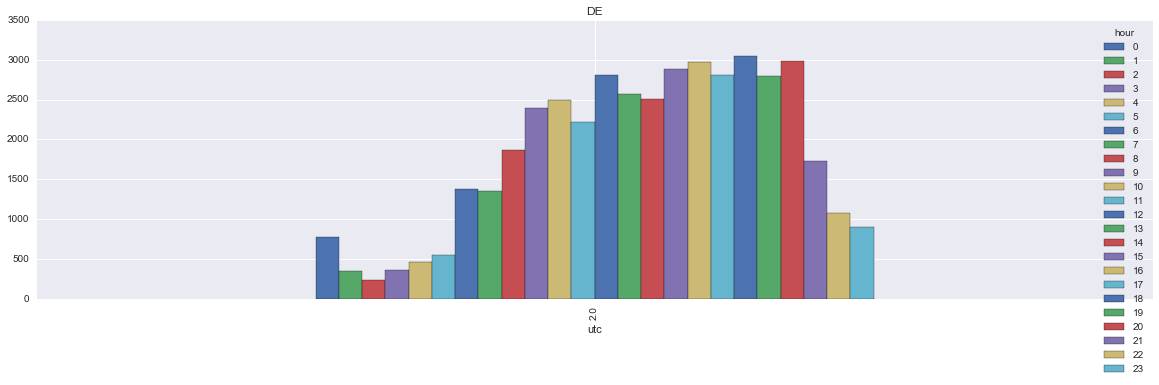

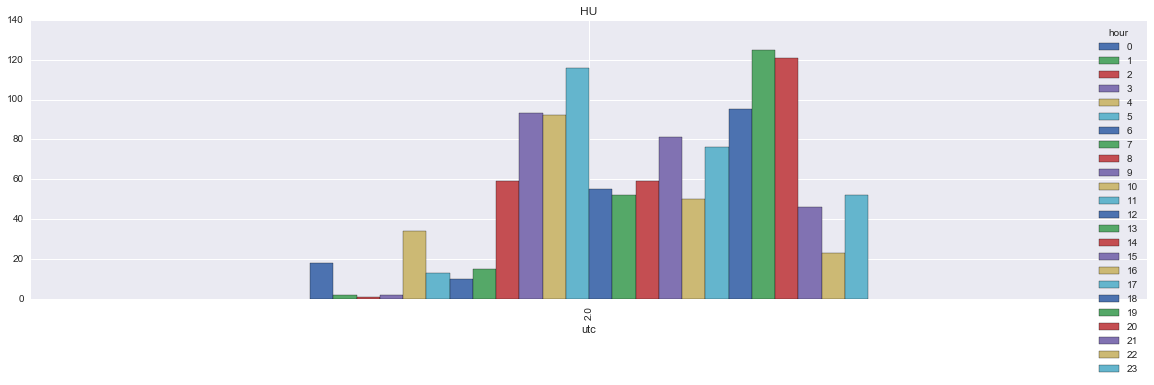

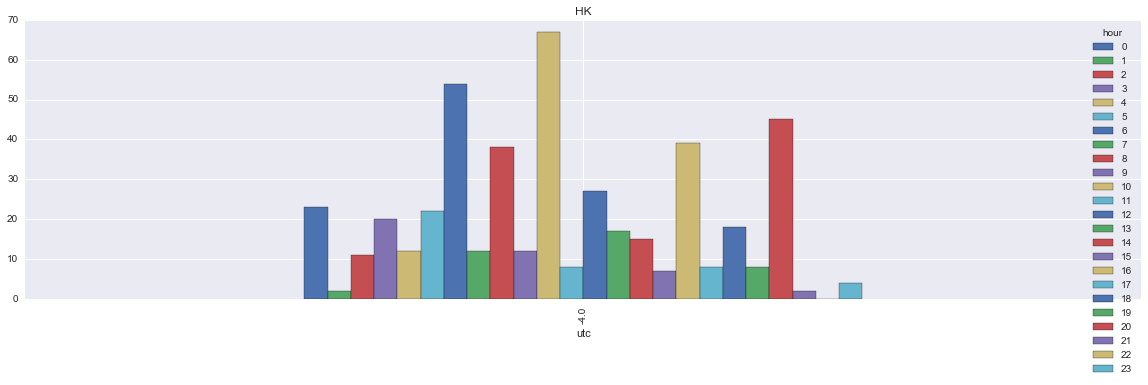

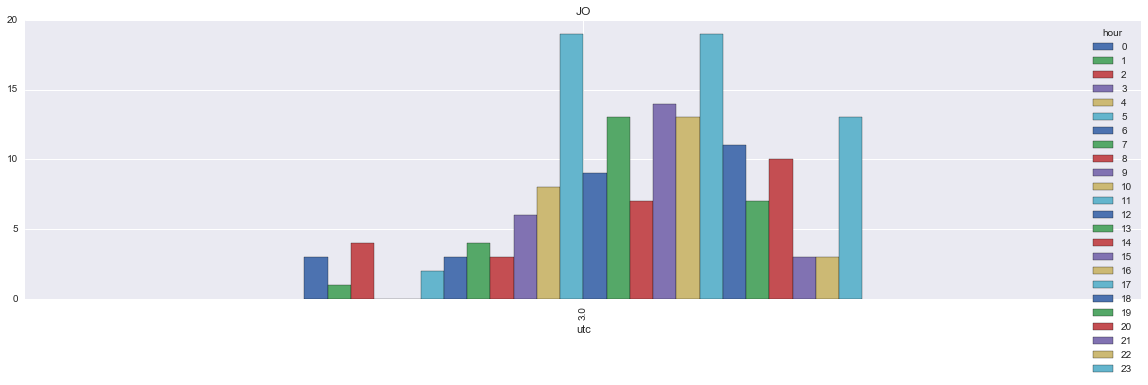

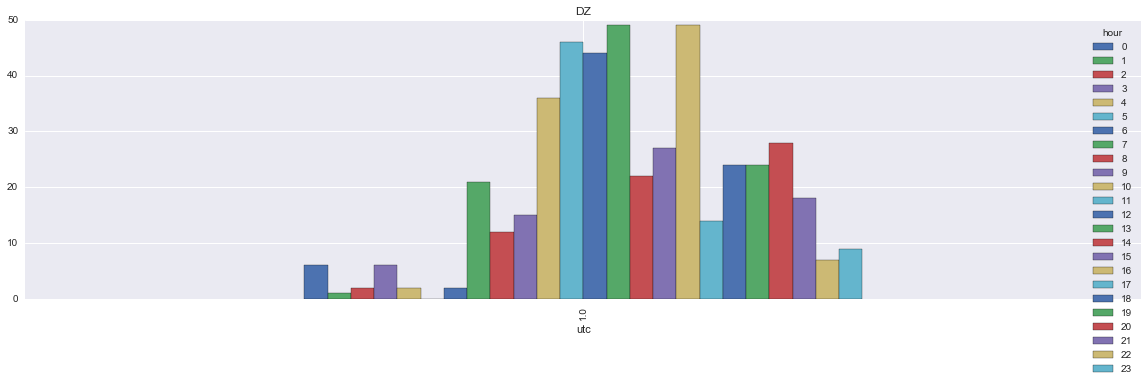

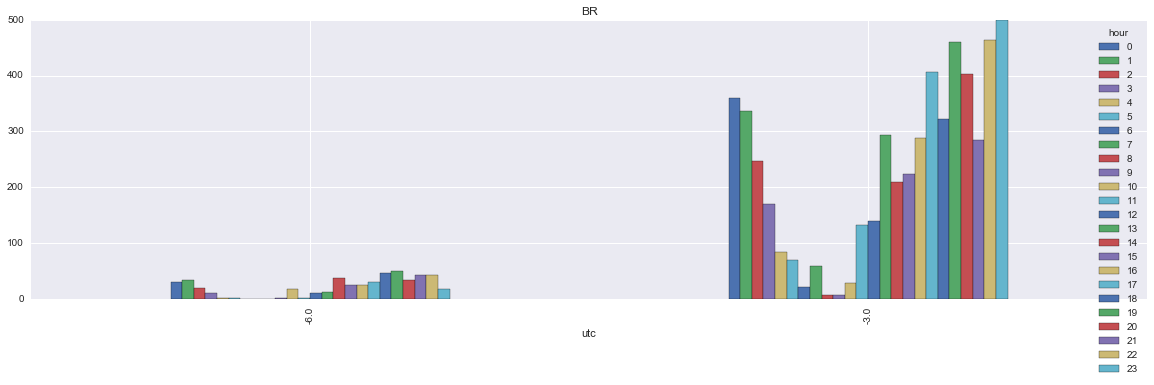

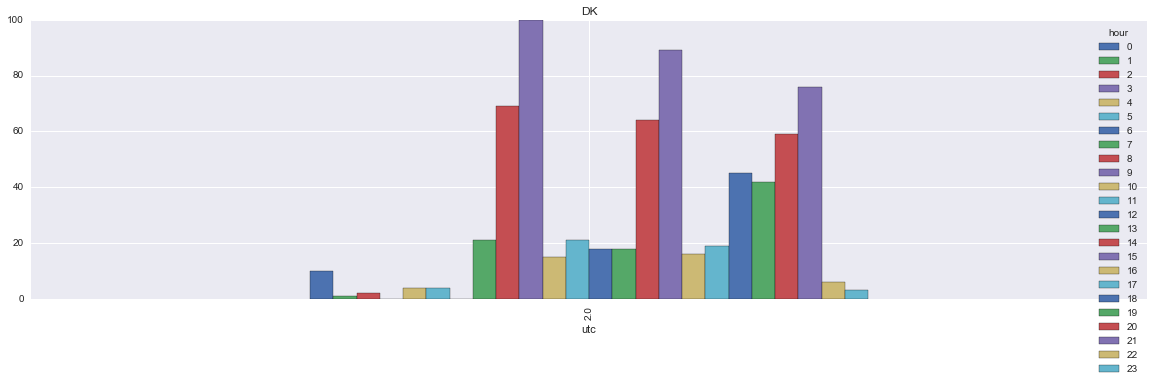

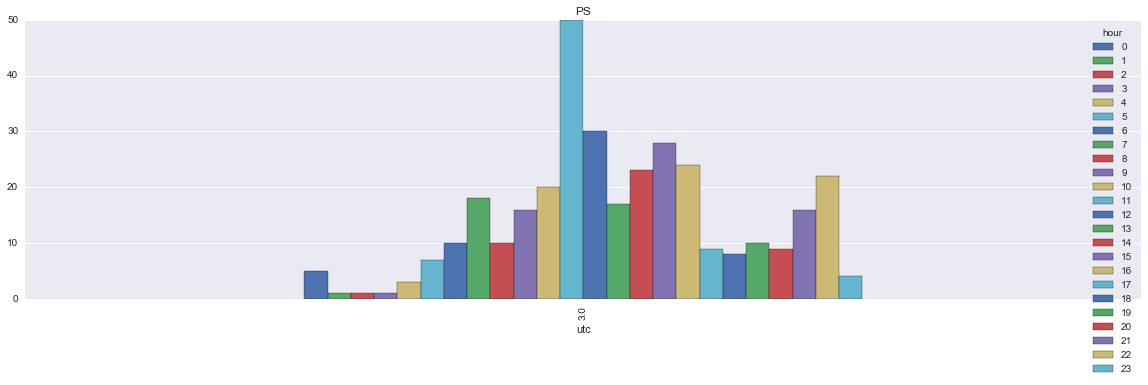

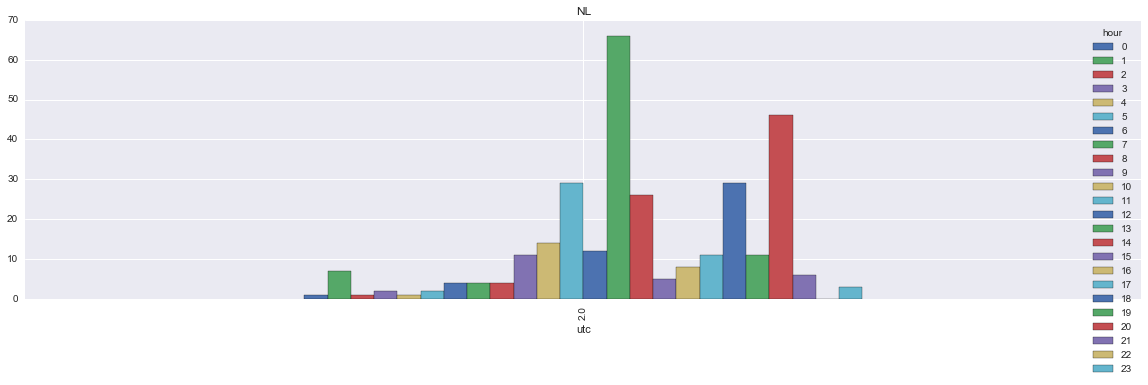

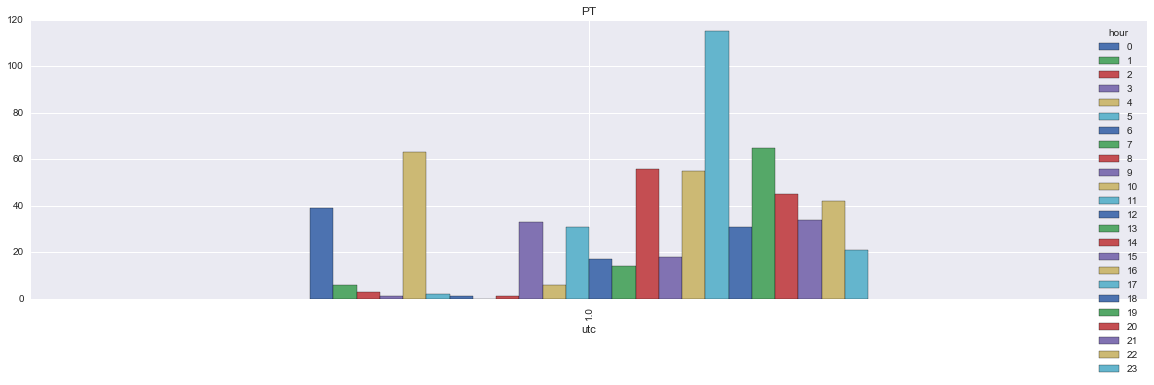

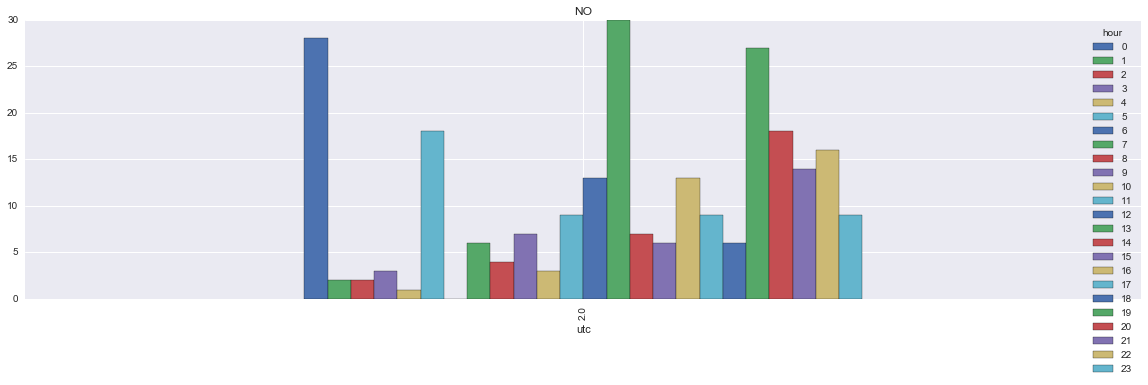

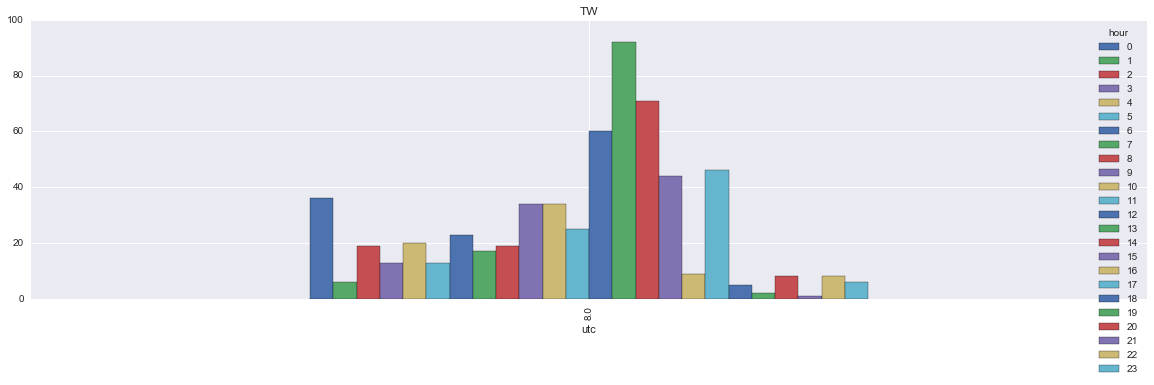

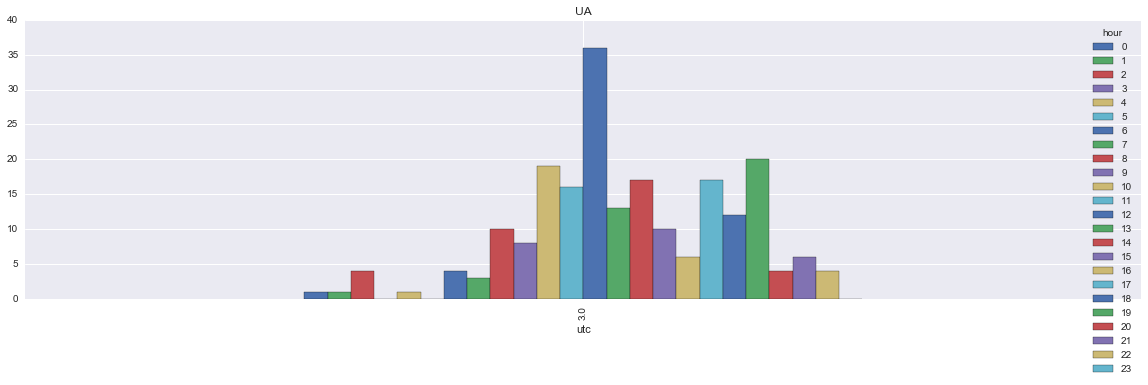

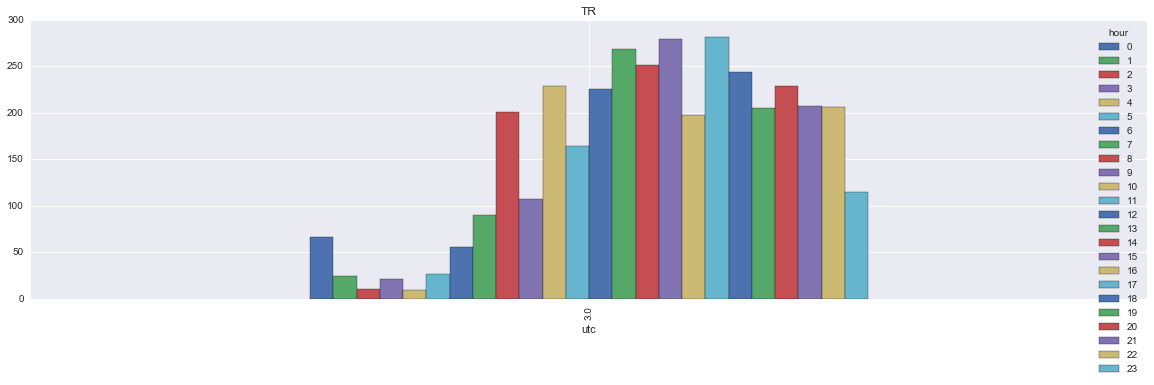

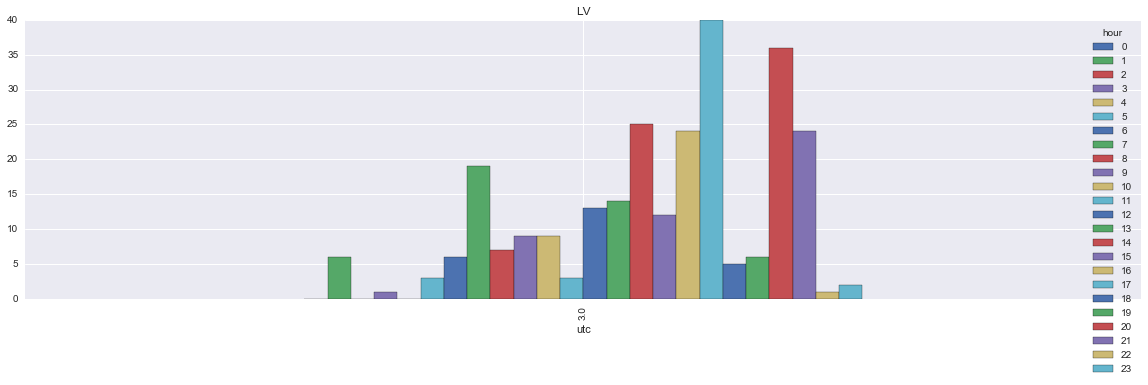

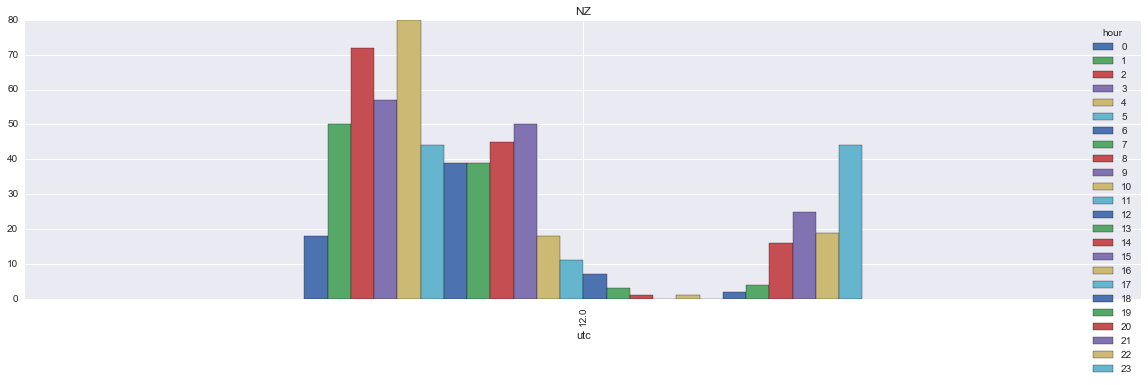

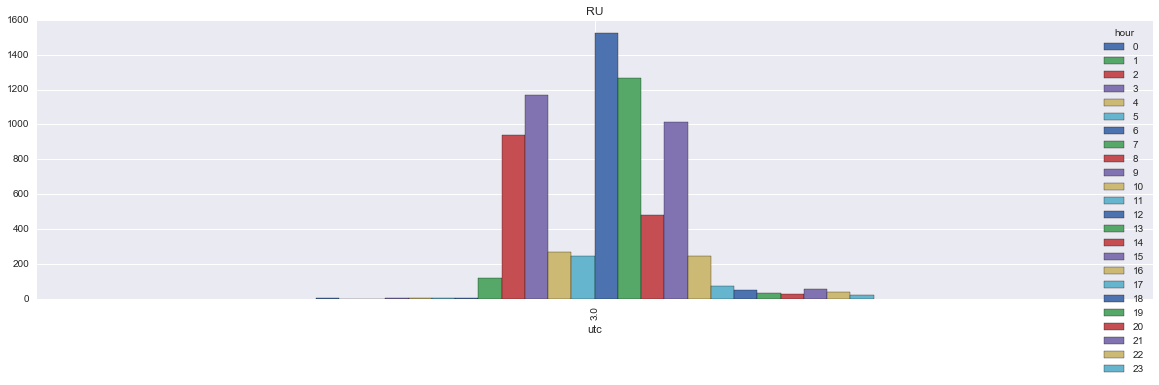

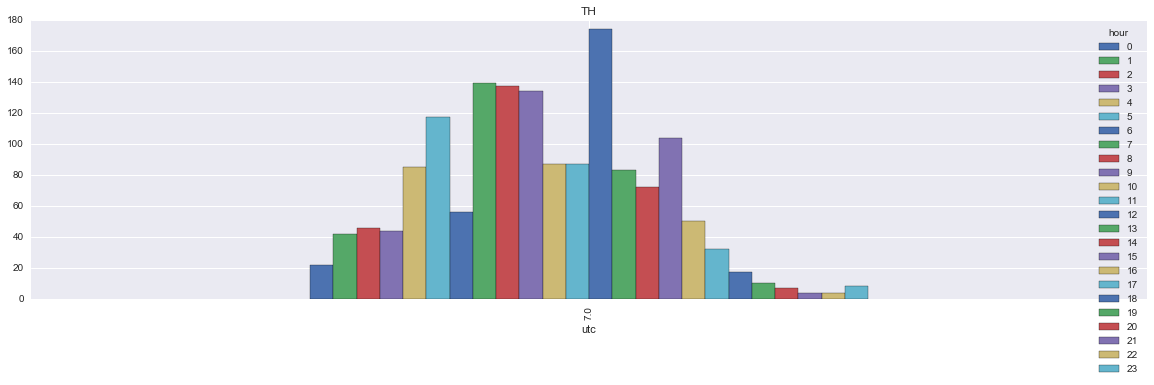

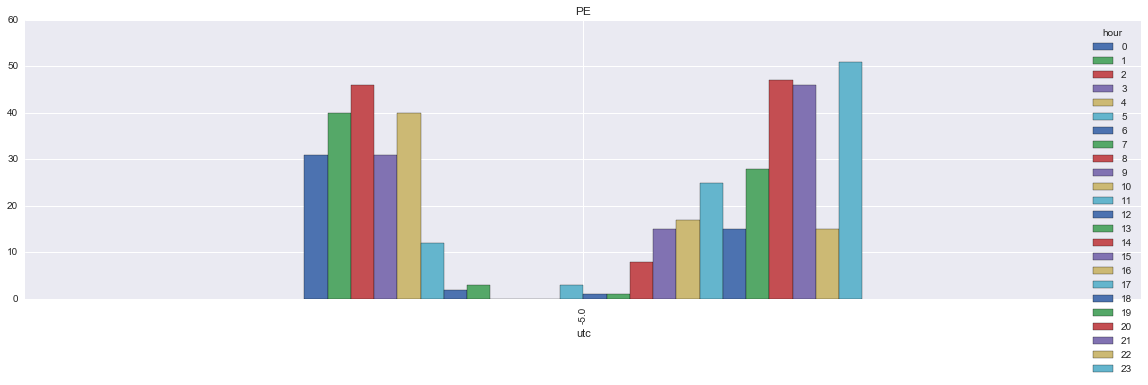

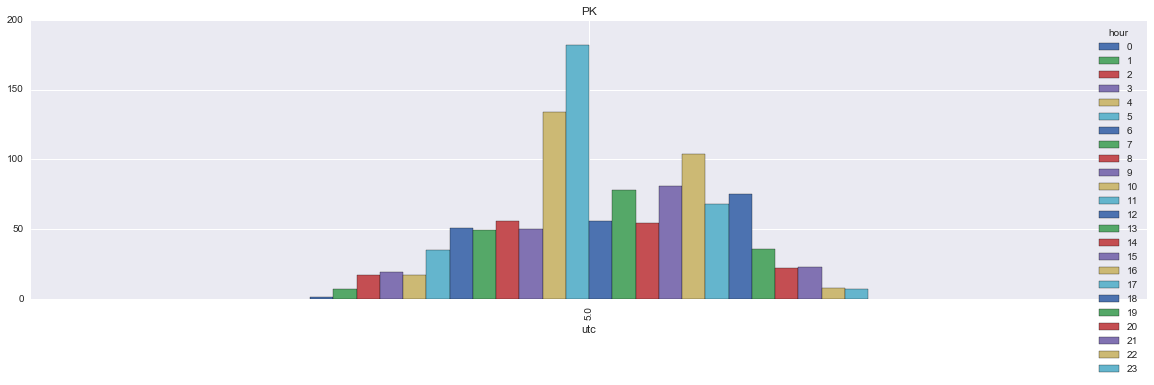

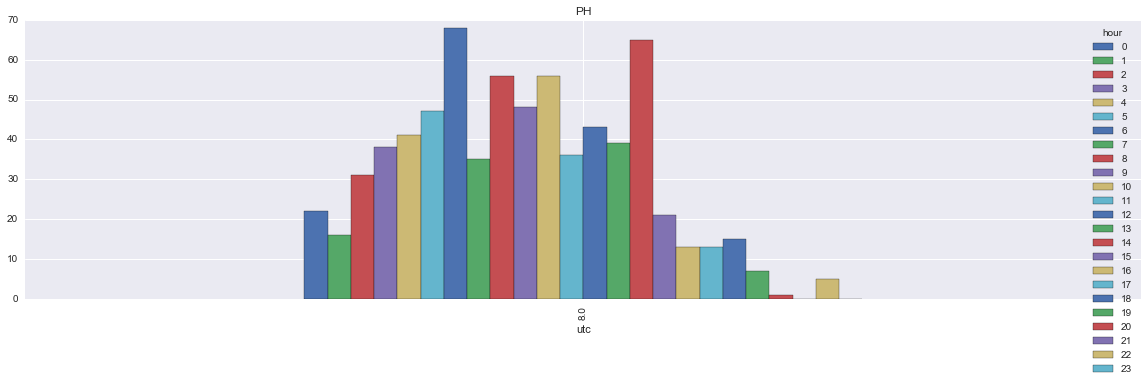

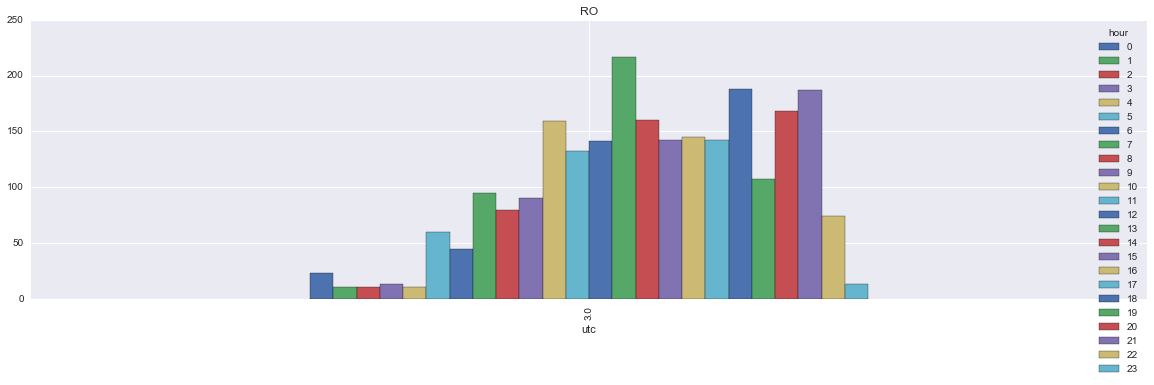

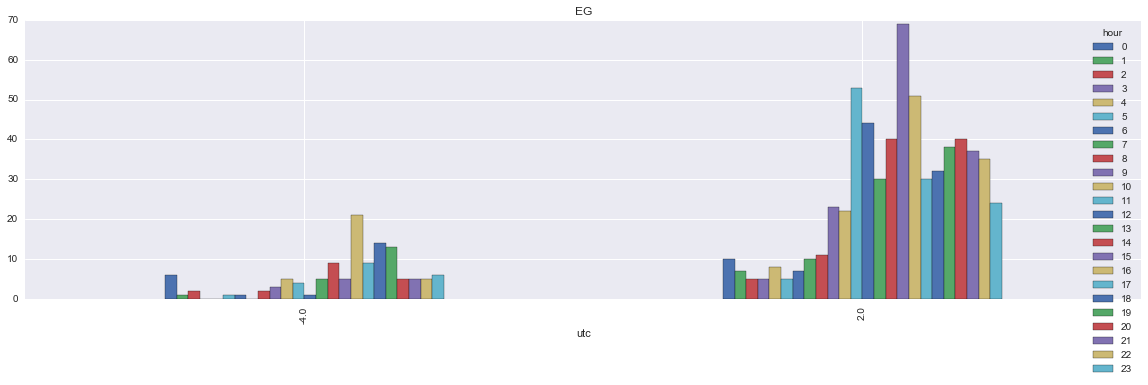

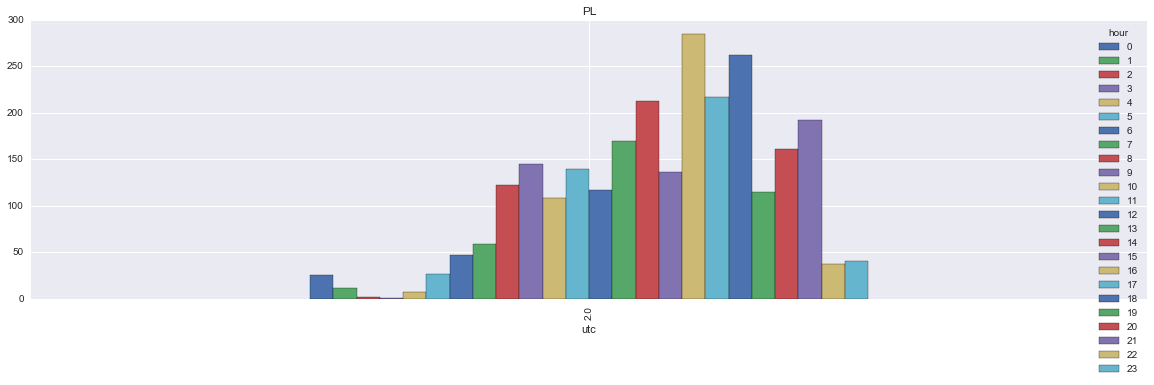

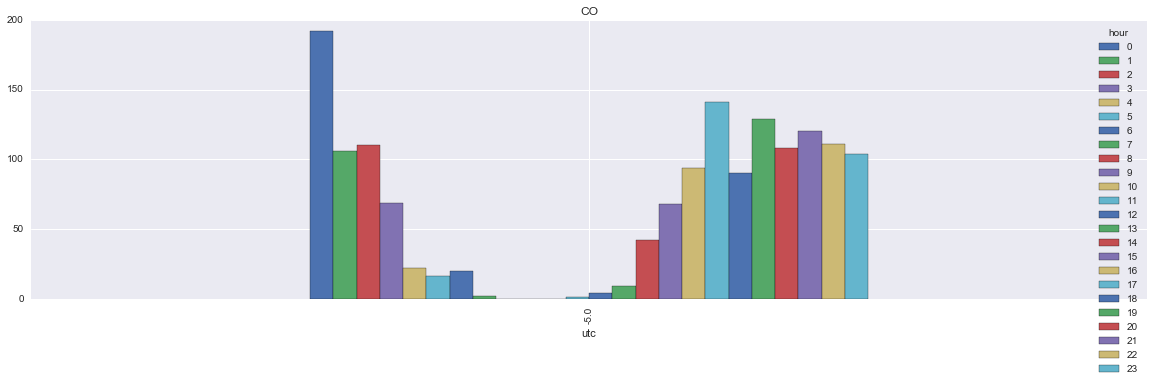

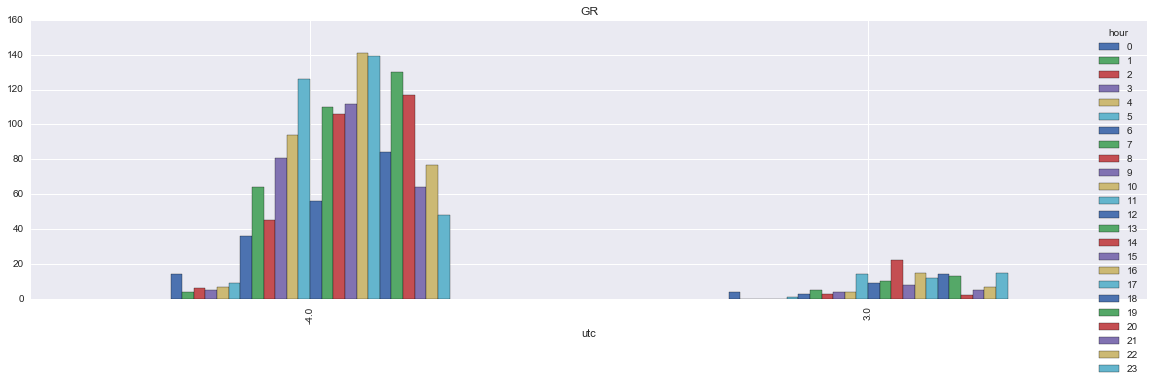

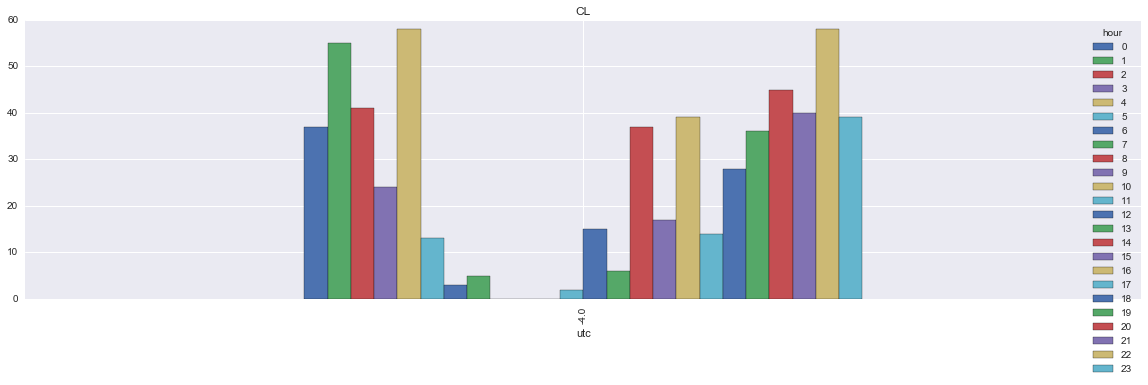

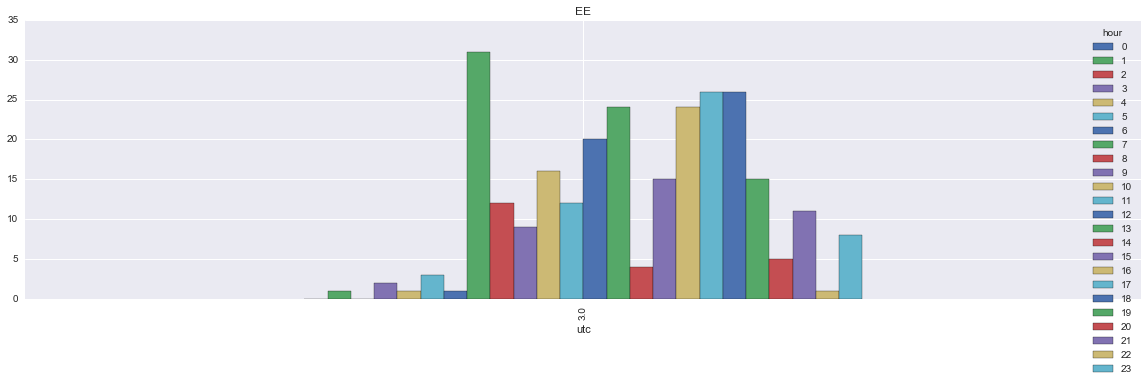

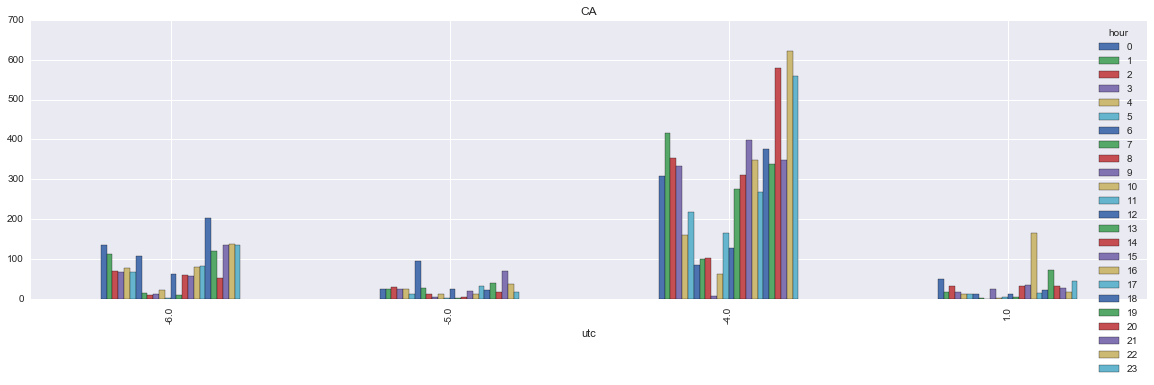

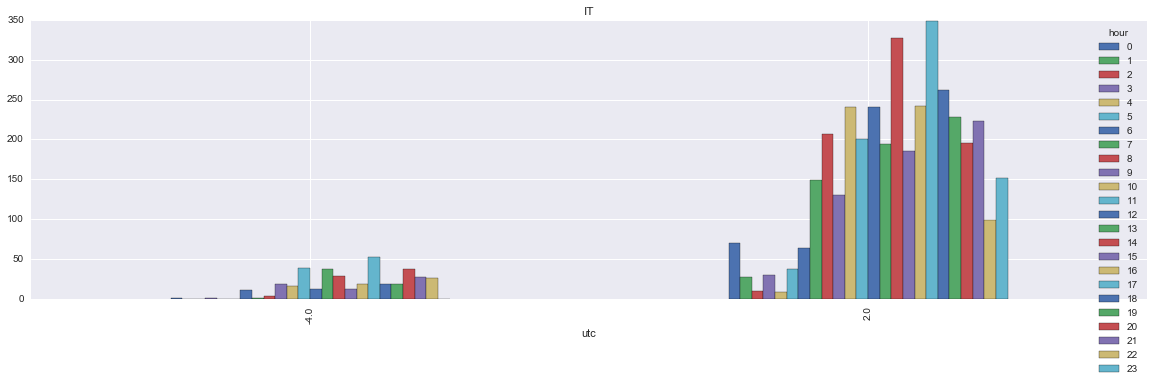

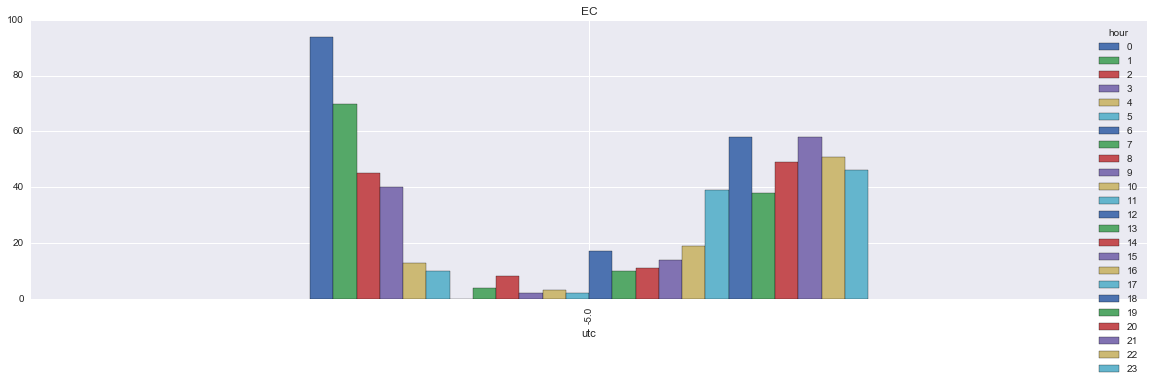

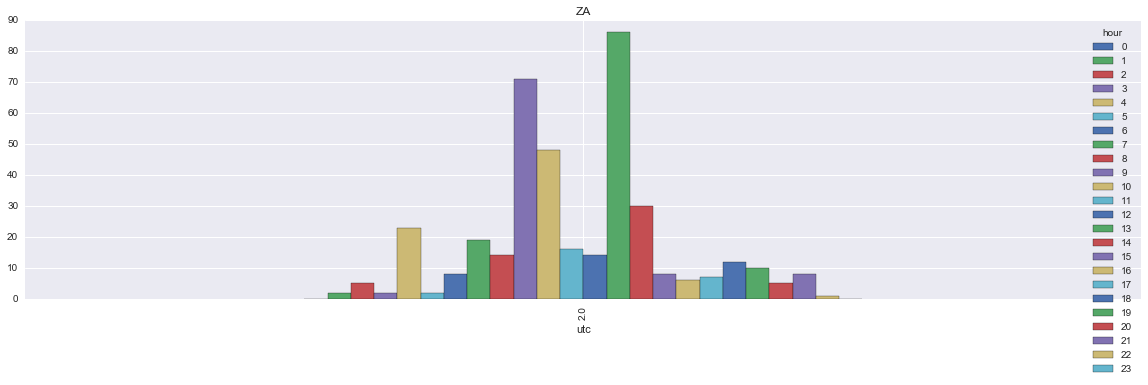

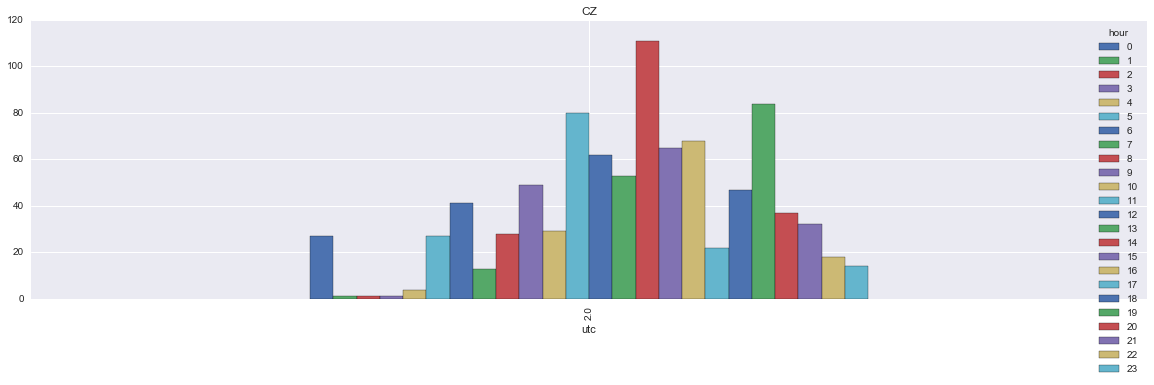

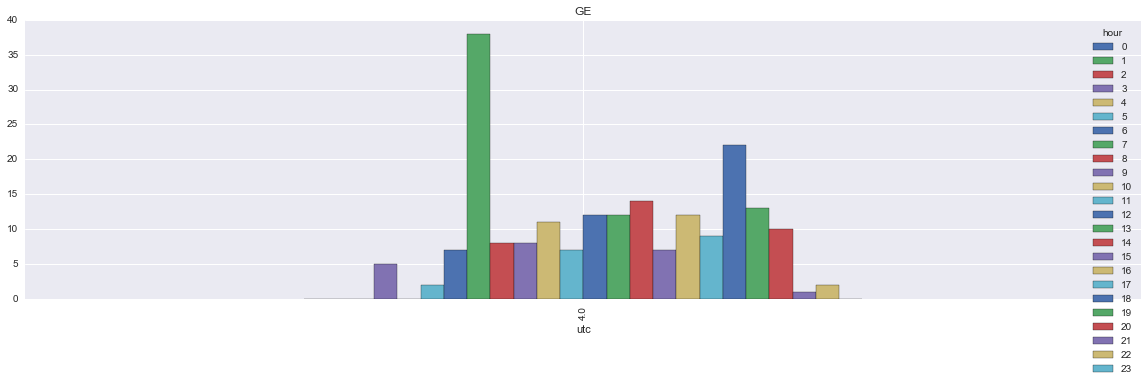

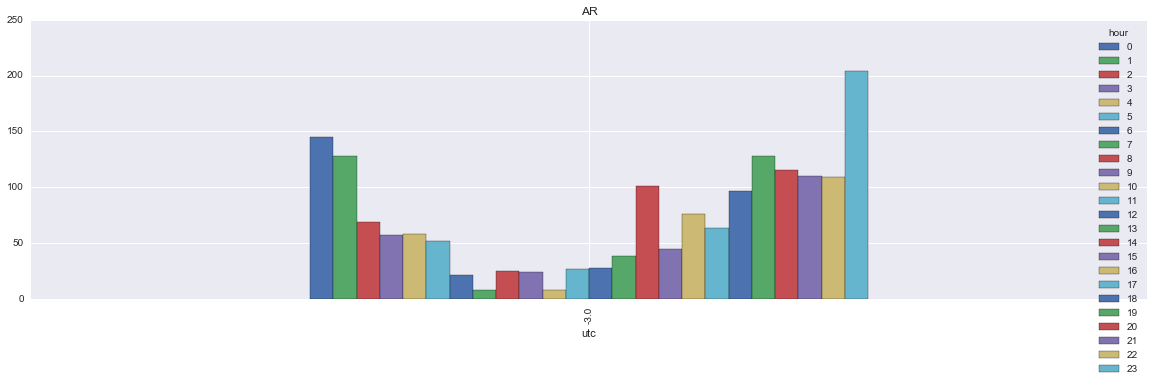

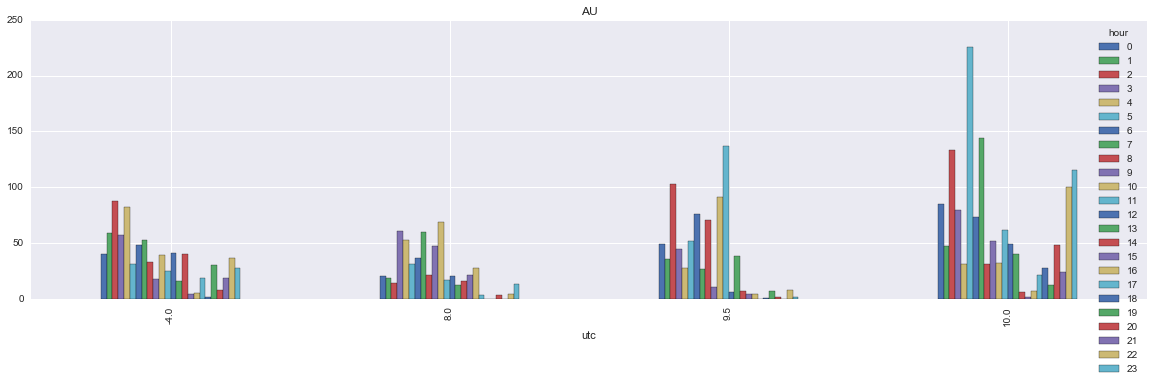

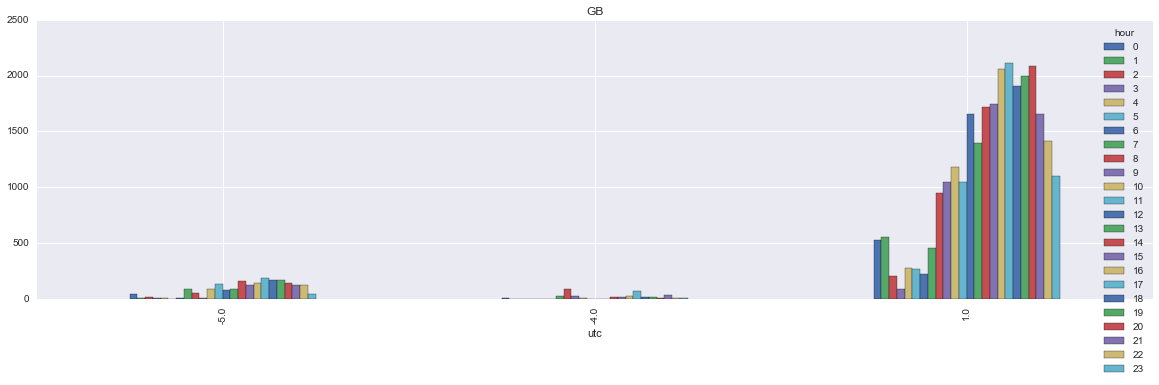

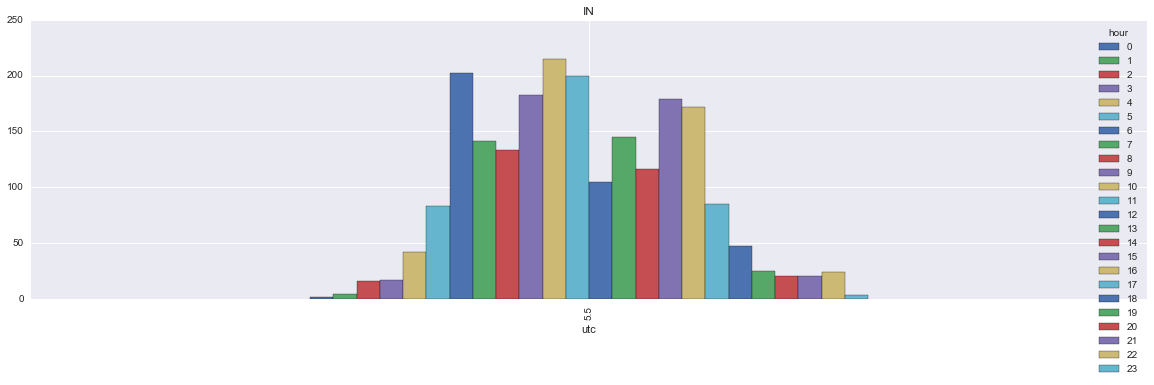

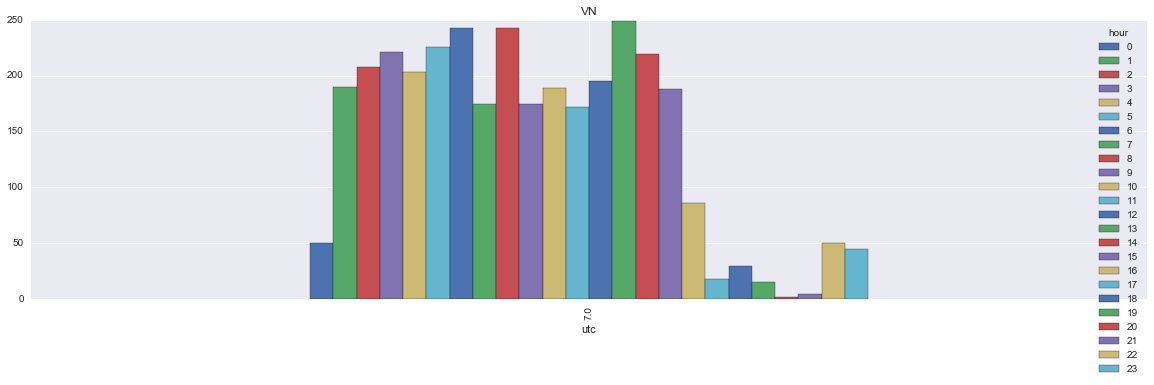

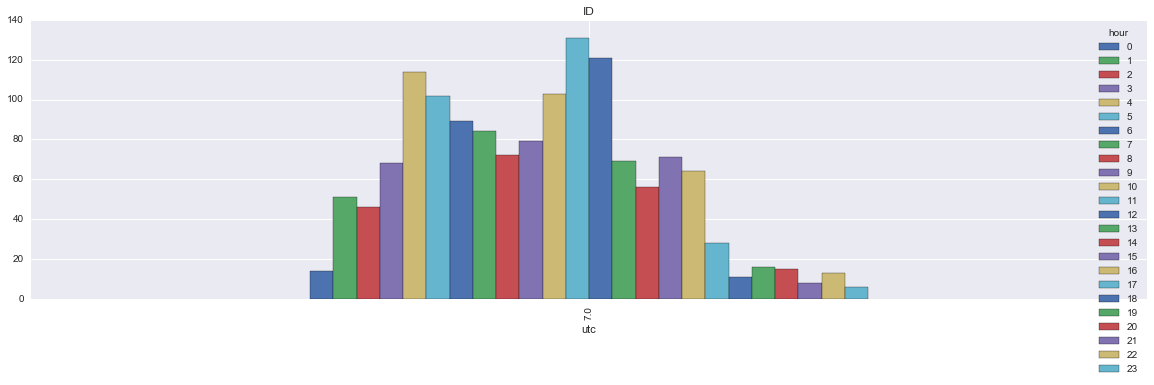

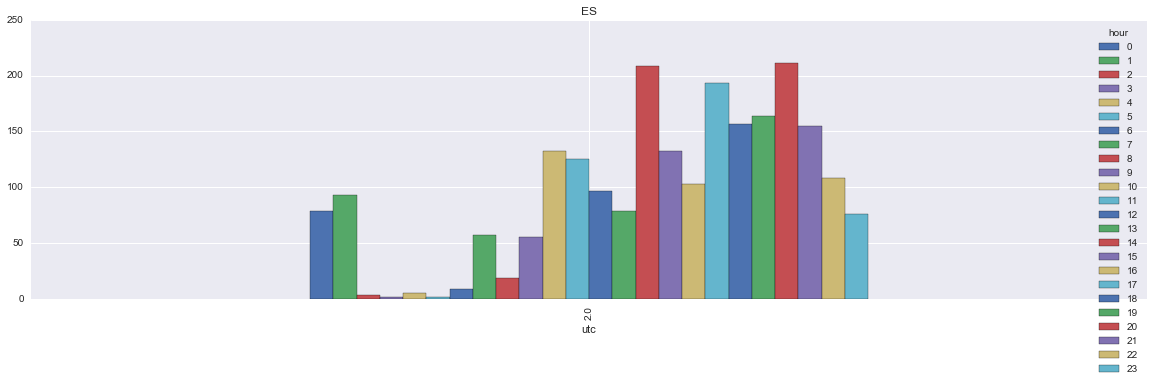

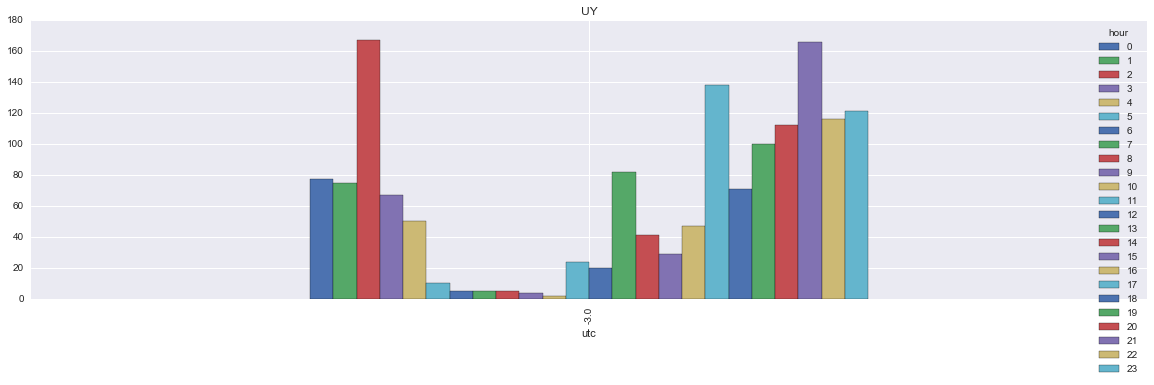

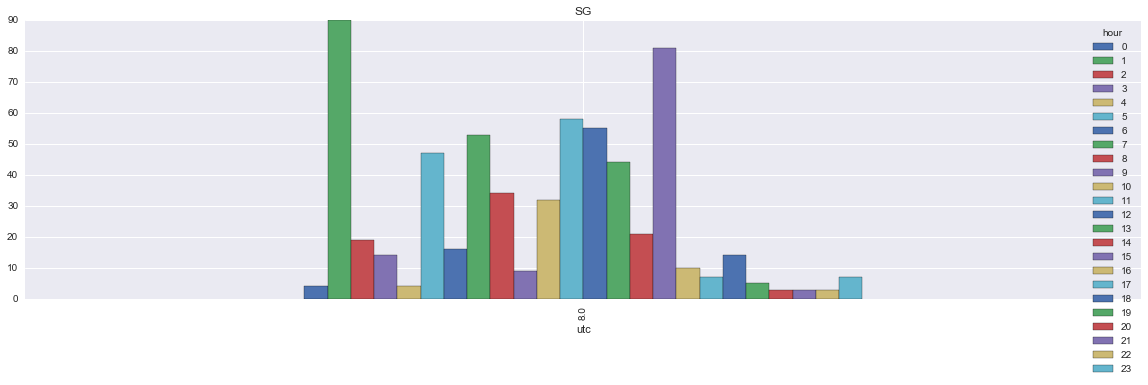

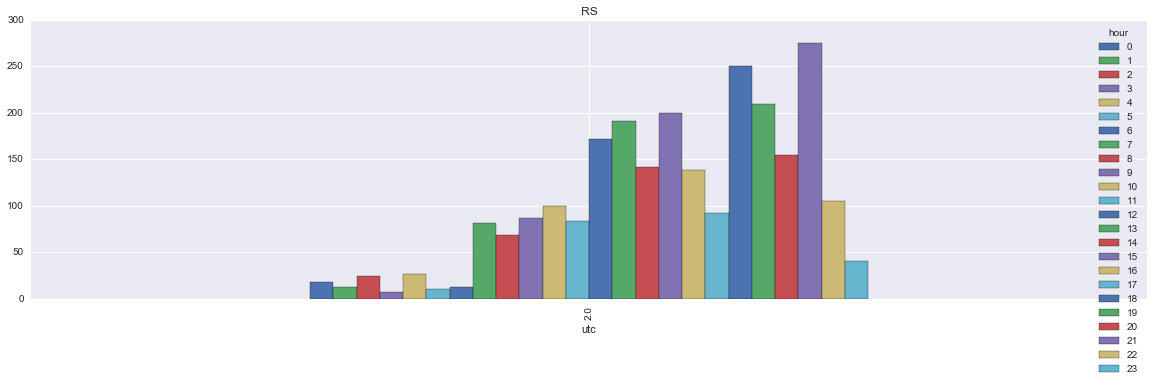

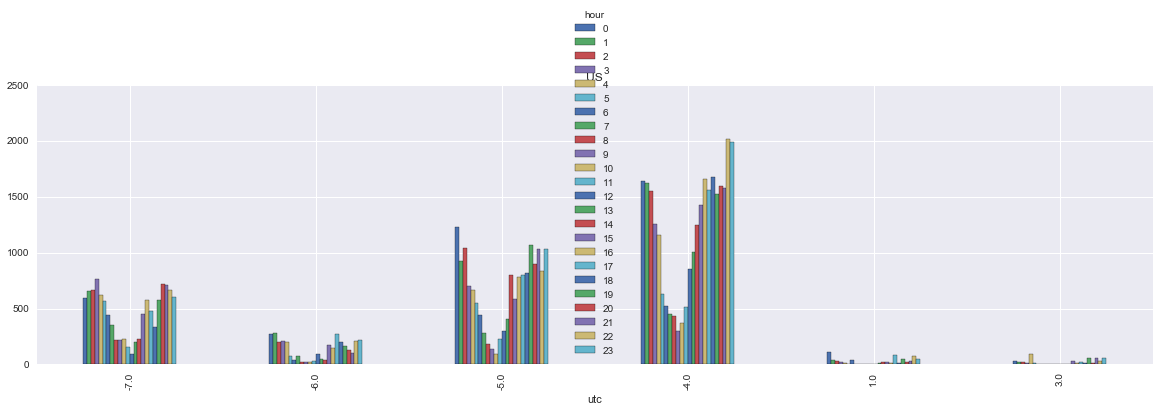

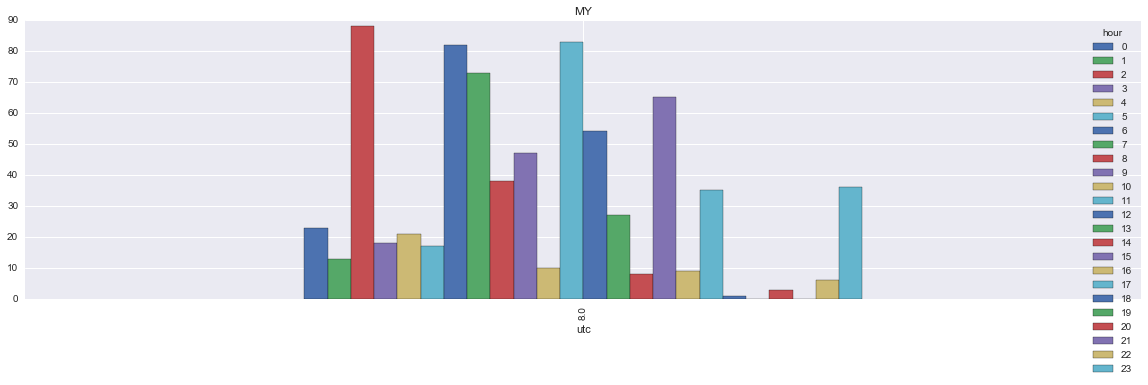

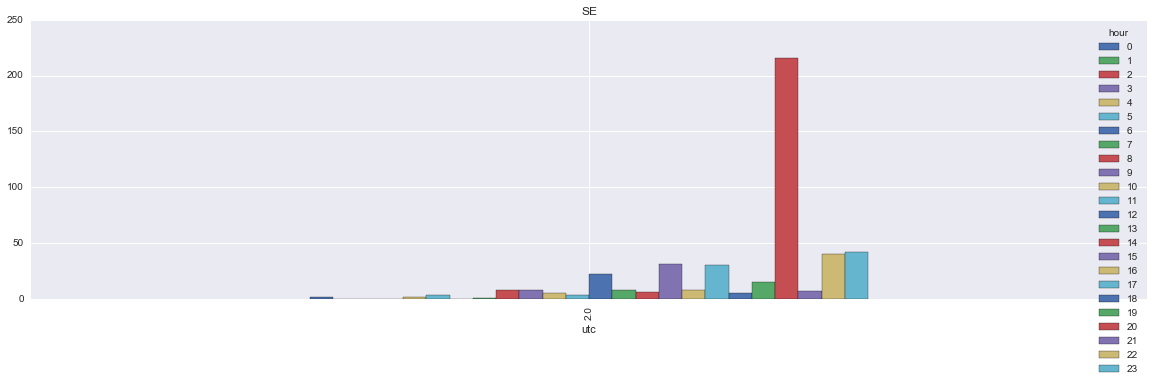

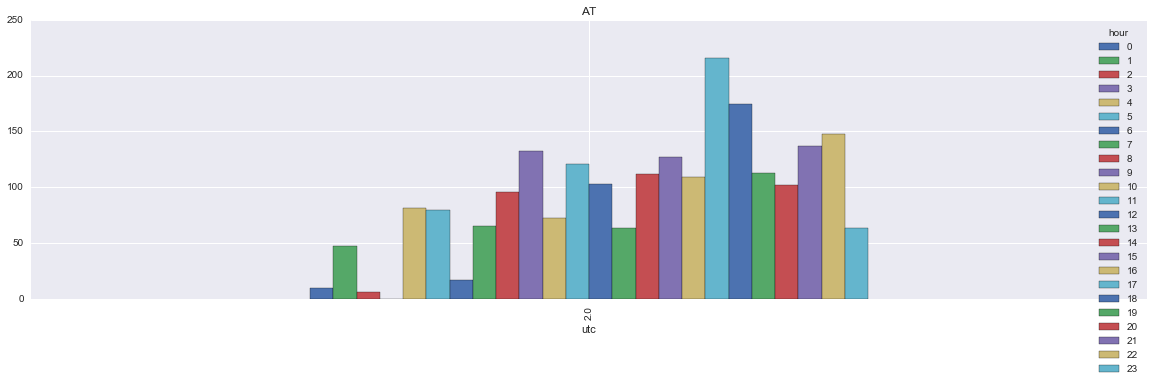

In [23]:
for country in c_list:
    table_c = table.xs(str(country), level=0)
    table_c.plot(kind = 'bar' , title=str(country), figsize=(20,5))

In [24]:
dict_utc_del = {
    'BR': [-6.0],
    'FG': [2.0],
    'GR': [-4.0],
    'CA': [1.0],
    'IT': [-4.0],
    'AU': [-4.0],
    'GB': [-5.0,-4.0],
    'US': [1.0,3.0]
}

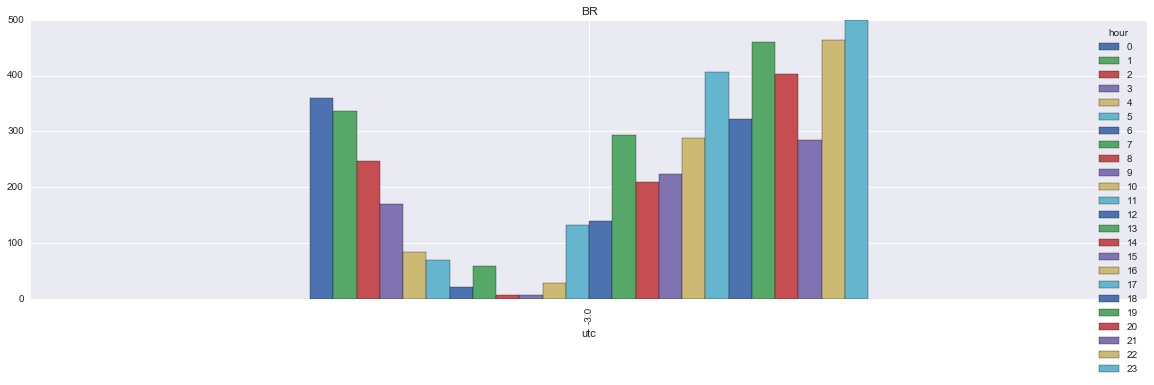

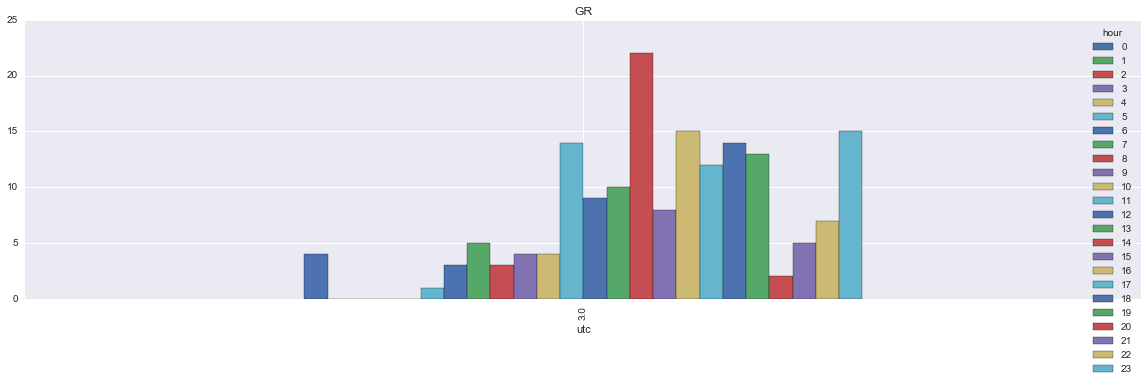

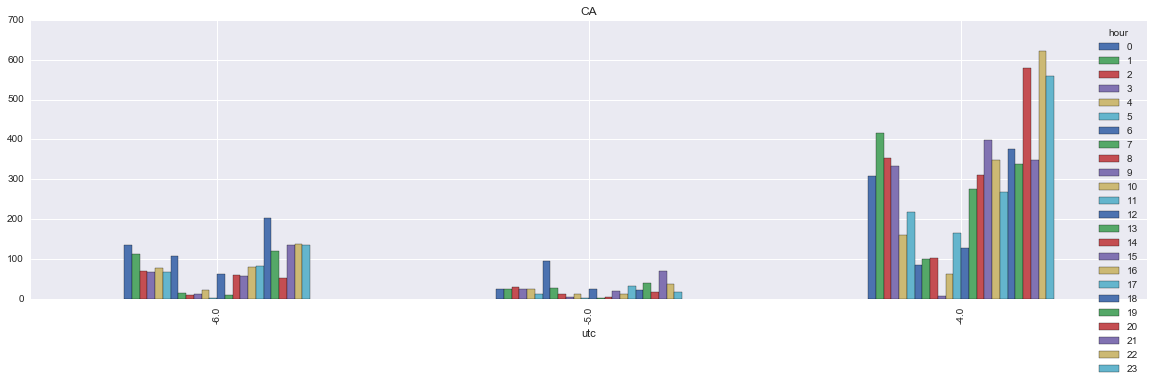

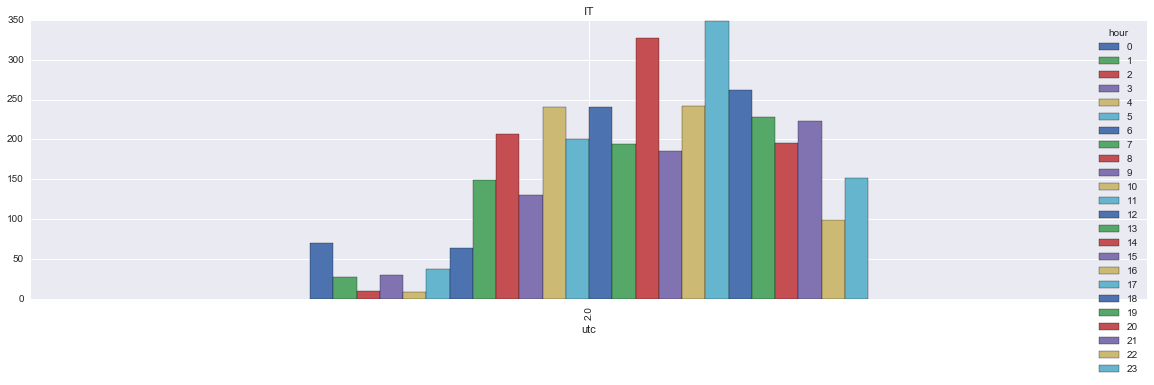

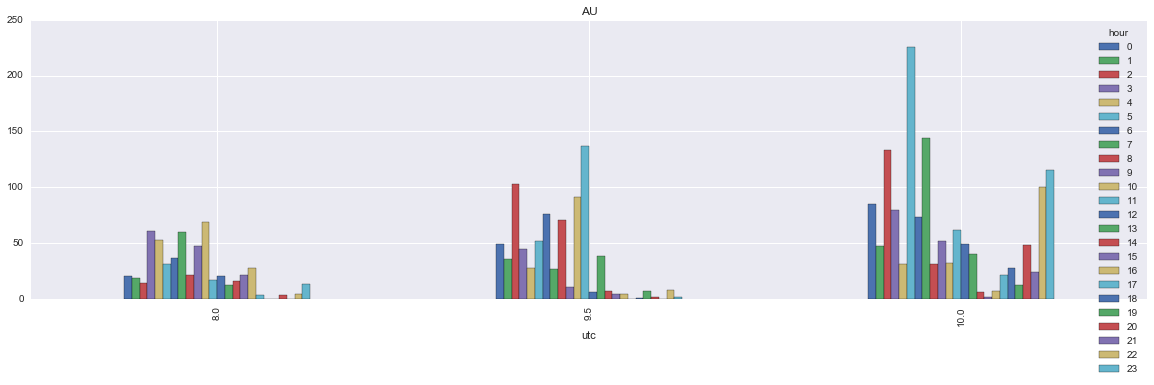

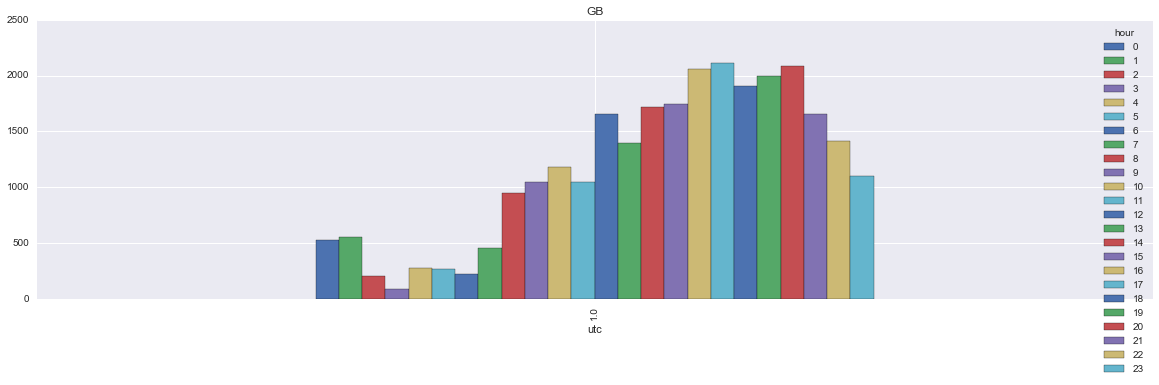

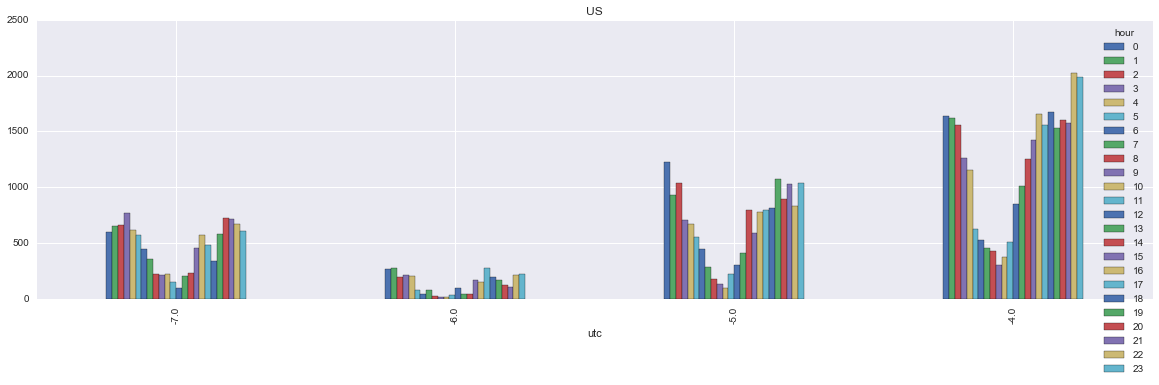

In [25]:
#Удаляем лишние часовые пояса
for country in c_list:
    for country_ch, utc in dict_utc_del.iteritems():
        if (country == country_ch):
            table_c = table.xs(str(country), level=0)
            table_c = table_c.reset_index('utc')
            for x in utc:
                table_c = table_c[table_c.utc != x]
            #print table_c
            table_c.plot(kind = 'bar' , title=str(country), x='utc', figsize=(20,5))